In [439]:
# Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [440]:
# Importing the dataset
df = pd.read_csv('benzin_prep.csv', sep=';')

In [441]:
df

,Date,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
0,2017-01-03,23.82,27.190858,28.422604,55.64,57.611681
1,2017-01-04,23.85,27.190858,28.422604,56.25,57.571419
2,2017-01-05,23.85,26.692366,27.858822,56.77,57.532696
3,2017-01-06,23.87,26.286719,27.603684,56.82,57.496014
4,2017-01-10,23.87,27.020929,28.612462,53.64,57.379405
...,...,...,...,...,...,...
877,2020-07-27,22.87,27.755900,32.224600,43.95,77.059356
878,2020-07-28,22.87,27.757100,32.604900,43.65,76.648569
879,2020-07-29,22.87,27.685100,32.453900,44.10,76.239853
880,2020-07-30,22.89,27.686700,32.469600,43.61,75.834026


In [442]:
# Cheking correlations
df.corr()

,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
Price,1.000000,0.122707,0.325755,0.811272,-0.499323
Kurs_dollar,0.122707,1.000000,0.796878,0.049954,-0.321807
Kurs_euro,0.325755,0.796878,1.000000,0.312308,-0.336990
Oil_price,0.811272,0.049954,0.312308,1.000000,-0.332643
Used,-0.499323,-0.321807,-0.336990,-0.332643,1.000000


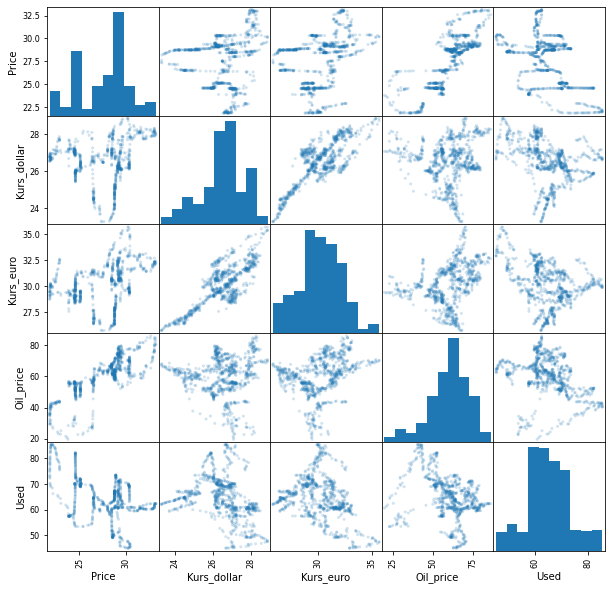

In [443]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [444]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:,2:6].values
y = df.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [445]:
# Fitting Simple Linear Regression to the Training set (Oil_price)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:,2:3], y_train)

In [446]:
# Getting parameters
sr.coef_, sr.intercept_

(array([0.18693878]), 16.253562029733274)

In [447]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 2:3])

In [448]:
# Coefficient of determination R^2
train_mod=[]
train_mod.append(sr.score(X_train[:, 2:3], y_train))
test_mod = []
test_mod.append(sr.score(X_test[:, 2:3], y_test))
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 2:3], y_test)

(0.673491474496046, 0.5787497034968804)

In [449]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse=[]
train_mse.append(mean_squared_error(y_train, sr.predict(X_train[:, 2:3])))
test_mse = []
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sr.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(2.4566132901231073, 2.8245455442114156)

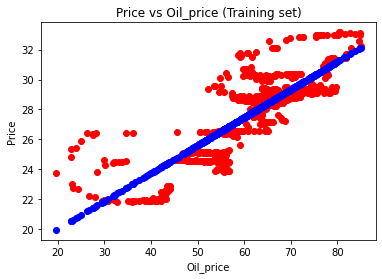

In [450]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sr.predict(X_train[:, 2:3]), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

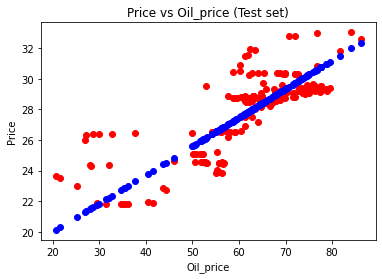

In [451]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sr.predict(X_test[:, 2:3]), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [452]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [453]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-0.00433576,  0.0298571 ,  0.16548723, -0.08019517]),
 21.973956598177416)

In [454]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [455]:
# Coefficient of determination R^2
train_mod.append(mr.score(X_train, y_train))
test_mod.append(mr.score(X_test, y_test))
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.7250212140418764, 0.6774759213656419)

In [456]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, mr.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(2.068909346376204, 2.1625716510346047)

In [457]:
#p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 =sm.OLS(y_train, X).fit()
mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     461.4
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.45e-194
Time:                        00:15:02   Log-Likelihood:                -1256.6
No. Observations:                 705   AIC:                             2523.
Df Residuals:                     700   BIC:                             2546.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9740      1.678     13.094      0.000      18.679      25.269
x1            -0.0043      0.086     -0.050      0.960      -0.173       0.165
x2             0.0299      0.053      0.567      0.571      -0.074       0.133
x3             0.1655      0.005     30.896      0.000       0.155       0.176
x4            -0.0802      0.008    -10.681      0.000      -0.095      -0.065
==============================================================================
Omnibus:                       28.715   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.128
Skew:                           0.498   Prob(JB):                     1.74e-07
Kurtosis:                       3.262   Cond. No.                     3.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

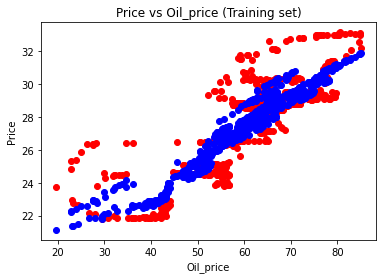

In [458]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], mr.predict(X_train), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

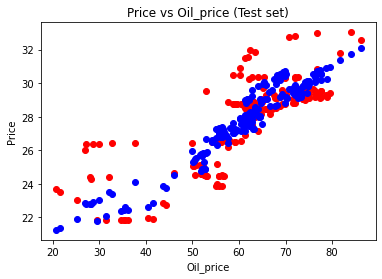

In [459]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [460]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures(degree=5).fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures(degree=5).fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [461]:
# Getting parameters
pr.coef_, pr.intercept_

(array([ 1.10961401e+01, -5.20695247e-01,  1.12903523e-02, -1.14026890e-04,
         4.36106279e-07]),
 -63.51155533409366)

In [462]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [463]:
# Coefficient of determination R^2
train_mod.append(pr.score(X_train_p[:,1:], y_train))
test_mod.append(pr.score(X_test_p[:,1:], y_test))
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.7700418826993409, 0.7386893962042689)

In [464]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, pr.predict(X_train_p[:,1:])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(1.7301789172596855, 1.7521262482979898)

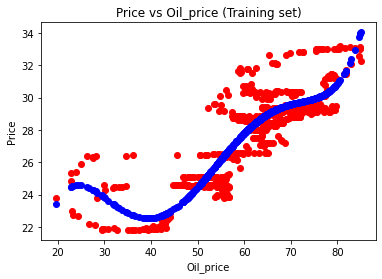

In [465]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

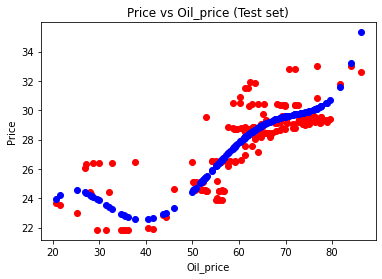

In [466]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [467]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.01
X_opt = X_train[:, :4]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [468]:
X_Modeled

array([[26.835271  , 63.53      , 61.48000671],
       [26.669955  , 58.42      , 65.65526275],
       [25.579541  , 52.31      , 73.5609    ],
       ...,
       [25.643112  , 64.03      , 73.29985285],
       [26.768706  , 71.1       , 60.82725553],
       [24.701001  , 59.3       , 67.19456998]])

In [469]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, [0,2,3]], y_train)

In [470]:
# Getting parameters
omr.coef_, omr.intercept_

(array([ 0.03540271,  0.16675486, -0.08002187]), 21.733214696953603)

In [471]:
# Predicting the Test set results
y_pred = omr.predict(X_test[:, [0,2,3]])

In [472]:
# Coefficient of determination R^2
train_mod.append(omr.score(X_train[:, [0,2,3]], y_train))
test_mod.append(omr.score(X_test[:, [0,2,3]], y_test))
omr.score(X_train[:, [0,2,3]], y_train), omr.score(X_test[:, [0,2,3]], y_test)

(0.7248949324030562, 0.6765692994408936)

In [473]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, omr.predict(X_train[:, [0,2,3]])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, omr.predict(X_train[:, [0,2,3]])), mean_squared_error(y_test, y_pred)

(2.0698594751722137, 2.168650685136397)

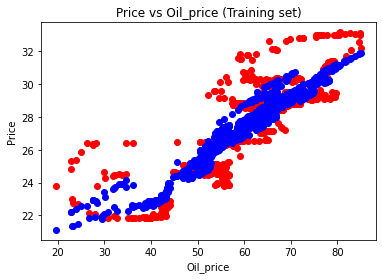

In [474]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], omr.predict(X_train[:, [0,2,3]]), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

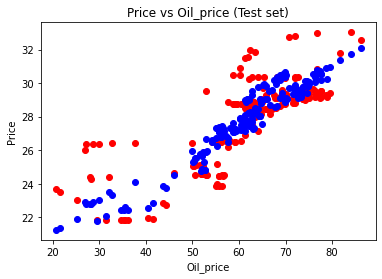

In [475]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], omr.predict(X_test[:, [0,2,3]]), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [476]:
# Creating dataset with metrics
model=['sr', 'mr', 'pr', 'omr']
metrics_df=pd.DataFrame()
metrics_df['model']=model
metrics_df['train_r2']=train_mod
metrics_df['test_r2']=test_mod
metrics_df['train_mse']=train_mse
metrics_df['test_mse']=test_mse
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.673491,0.578750,2.456613,2.824546
1,mr,0.725021,0.677476,2.068909,2.162572
2,pr,0.770042,0.738689,1.730179,1.752126
3,omr,0.724895,0.676569,2.069859,2.168651
